In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('../../datasets/df_german_credit.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Databases/Week 19/df_german_credit.csv'

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,housing_encoded,sex_encoded
0,0,67,male,2,own,little,little,1169,6,radio/TV,1,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0
2,2,49,male,1,own,little,little,2096,12,education,1,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,1
4,4,53,male,2,free,little,little,4870,24,car,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

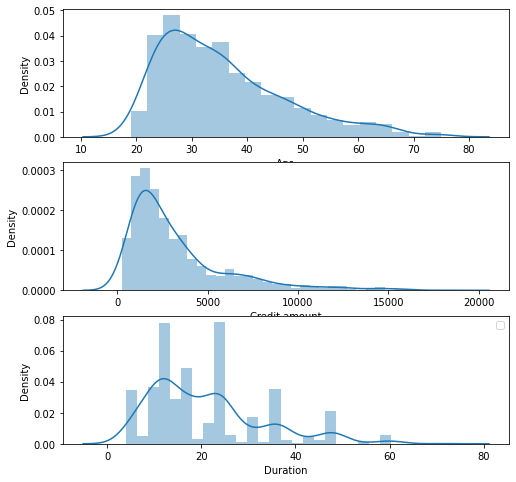

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df["Age"],ax=ax1)
sns.distplot(df["Credit amount"],ax=ax2)
sns.distplot(df["Duration"],ax=ax3)
plt.legend()

In [ ]:
df_cluster = df[['Age','Credit amount','Duration']]
df_cluster.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

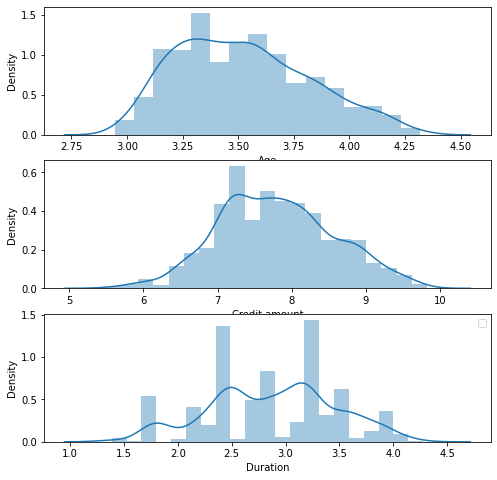

In [ ]:
df_cluster_log = np.log(df_cluster)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"],ax=ax1)
sns.distplot(df_cluster_log["Credit amount"],ax=ax2)
sns.distplot(df_cluster_log["Duration"],ax=ax3)
plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_log)

# Silhoutte Score

Mide la separabilidad entre clusters. Esta técnica mide la separabilidad entre grupos. 

* Primero, se encuentra una distancia promedio entre cada punto y todos los demás puntos en un grupo. 
* Luego mide la distancia entre cada punto y cada punto en otros grupos.
* Restamos las dos medidas promedio y dividimos por el promedio que sea mayor. \\

Nos ayuda a obtener numero de clusters optimo


In [ ]:
#Inicializar variables
scores =[]
intertias = []
values = np.arange(2,10)

In [ ]:
for num_clusters in values:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df_cluster_scaled)
  score= metrics.silhouette_score(df_cluster_scaled,kmeans.labels_,metric ='euclidean',sample_size=len(df_cluster_scaled))

  print("\n Numero de clusters :", num_clusters)
  print("Silhoutte Score = ", score)
  scores.append(score)



 Numero de clusters : 2
Silhoutte Score =  0.3153441336069185

 Numero de clusters : 3
Silhoutte Score =  0.30318933408774545

 Numero de clusters : 4
Silhoutte Score =  0.26680086247340895

 Numero de clusters : 5
Silhoutte Score =  0.26725893156029423

 Numero de clusters : 6
Silhoutte Score =  0.26528976402717536

 Numero de clusters : 7
Silhoutte Score =  0.2553019349485556

 Numero de clusters : 8
Silhoutte Score =  0.2595732875466741

 Numero de clusters : 9
Silhoutte Score =  0.2532975375929726


#Elbow Method
Intuitivamente, la **inercia** dice qué tan lejos están los puntos dentro de un grupo. Por lo tanto, se busca un poco de inercia. El rango del valor de la inercia comienza desde cero y aumenta.



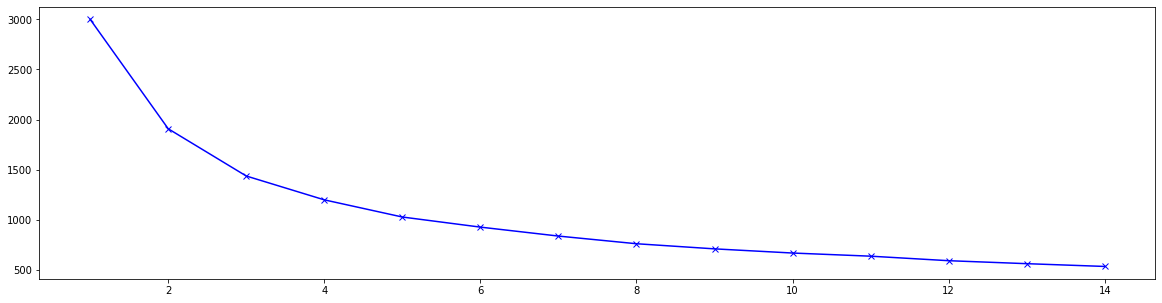

In [ ]:
sum_of_squared_distances = []
K=range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df_cluster_scaled)
  sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5)) 
plt.plot(K,sum_of_squared_distances,'bx-')
plt.show()

# Visualización 3D

K-Means


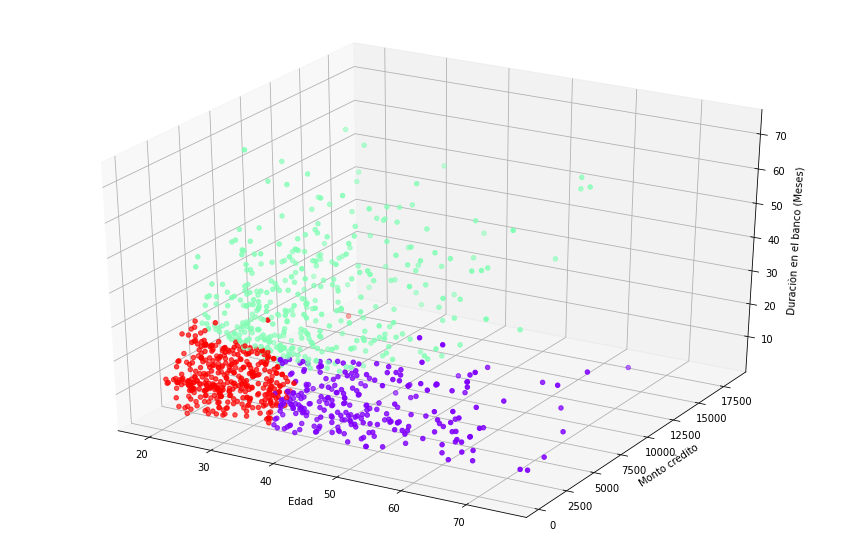

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3, random_state=123)
model.fit(df_cluster_scaled)
kmeans_labels = model.labels_

# Plotteando figura
fig = plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
# ·Plotteando 3D
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Edad', linespacing=3.2)
yLabel = ax.set_ylabel('Monto crèdito', linespacing=3.1)
zLabel = ax.set_zlabel('Duraciòn en el banco (Meses)', linespacing=3.4)

print("K-Means")


In [ ]:
import plotly.graph_objs as go

escena = dict(xaxis = dict(title ='Age'), yaxis = dict(title='Credit amount'),zaxis = dict(title ='Duration'))
puntitos = go.Scatter3d(x=df_cluster['Age'], y = df_cluster['Credit amount'],z= df_cluster['Duration'], mode='markers', 
                        marker = dict(color = kmeans_labels, colorscale='rainbow', size =10, line = dict(color ='gray', width=5)) )
layout = go.Layout(margin = dict(l=0, r=0), scene= escena, height=1000,width=1000)
data=[puntitos]
fig = go.Figure(data=data,layout=layout)
fig.show()

In [ ]:
df_clustered_kmeans = df_cluster.assign (Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Age,Credit amount,Duration
Cluster,,,
0,48.7,1978.7,13.9
1,34.0,5665.4,32.2
2,27.8,1733.6,14.2


##Agglomerative Clustering

Agglomerative Clustering es un miembro de la familia Hierarchical Clustering que funciona fusionando cada grupo con el proceso que se repite hasta que todos los datos se han convertido en un solo grupo.

Los pasos que da el agrupamiento aglomerativo son:

1. Cada punto de datos se asigna como un solo grupo
2. Determine la medida de la distancia y calcule la matriz de distancia
3. Determinar los criterios de vinculación para fusionar los clústeres.
4. Actualizar la matriz de distancias
5. Repita el proceso hasta que cada punto de datos se convierta en un grupo

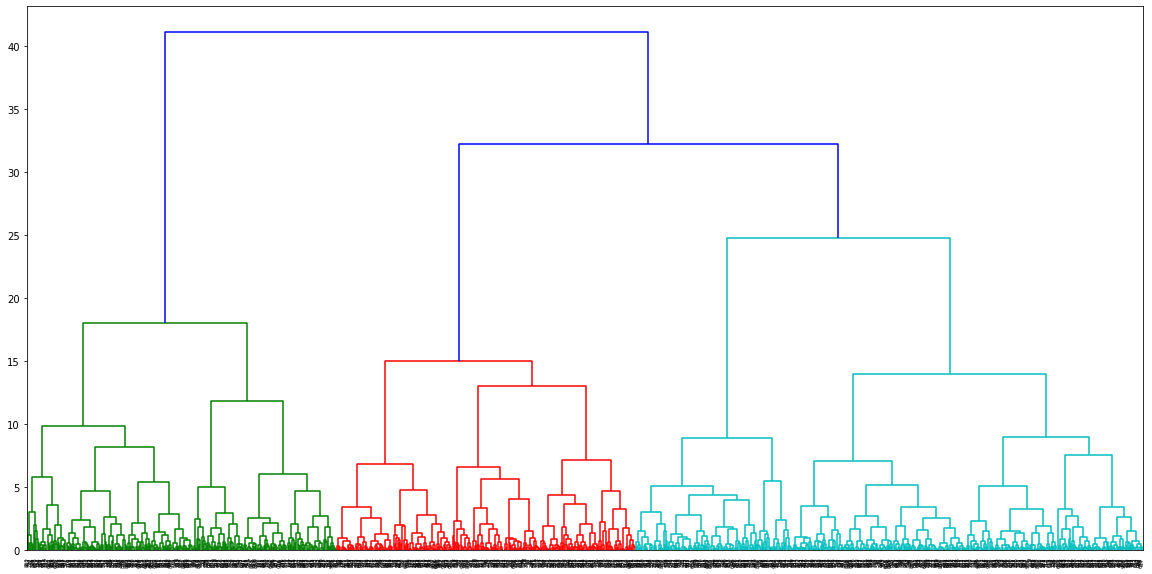

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_cluster_scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
for num_clusters in values:
  ac = AgglomerativeClustering(n_clusters=num_clusters)
  ac.fit(df_cluster_scaled)
  score= metrics.silhouette_score(df_cluster_scaled,ac.labels_,metric ='euclidean',sample_size=len(df_cluster_scaled))

  print("\n Numero de clusters :", num_clusters)
  print("Silhoutte Score = ", score)
  scores.append(score)


 Numero de clusters : 2
Silhoutte Score =  0.271523925266929

 Numero de clusters : 3
Silhoutte Score =  0.24114611066359173

 Numero de clusters : 4
Silhoutte Score =  0.23516132192529007

 Numero de clusters : 5
Silhoutte Score =  0.22637878611347742

 Numero de clusters : 6
Silhoutte Score =  0.20657375240773732

 Numero de clusters : 7
Silhoutte Score =  0.2007796519469468

 Numero de clusters : 8
Silhoutte Score =  0.20797768642134373

 Numero de clusters : 9
Silhoutte Score =  0.2053220139842984


Hierarchical Agglomerative Clustering


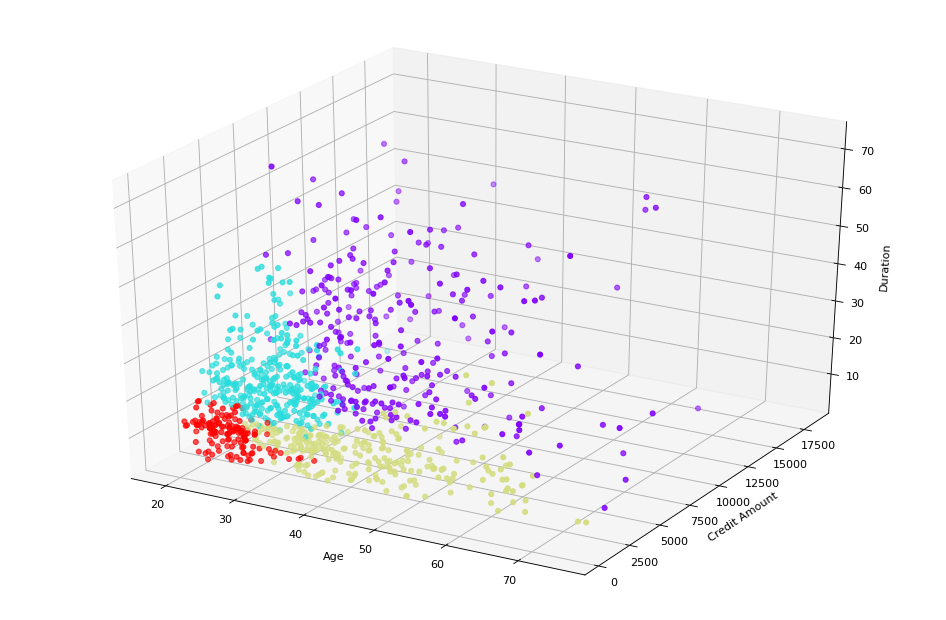

In [ ]:

model = AgglomerativeClustering(n_clusters=4)
model.fit(df_cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [ ]:
df_clustered_hac = df_cluster.assign (Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Age,Credit amount,Duration
Cluster,,,
0,40.4,6477.0,32.0
1,28.8,2748.0,23.6
2,44.0,1644.1,11.7
3,25.1,1231.5,10.6


In [ ]:
grouped_kmeans

,Age,Credit amount,Duration
Cluster,,,
0,48.7,1978.7,13.9
1,34.0,5665.4,32.2
2,27.8,1733.6,14.2


##DBSCAN

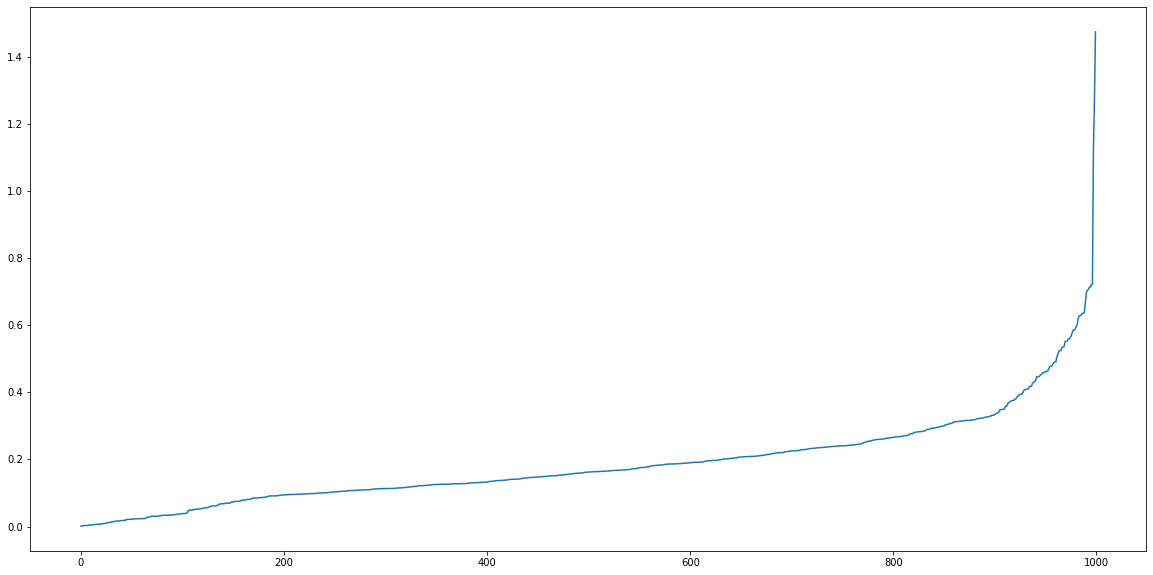

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(df_cluster_scaled)
distances, indices = nearest_neighbors.kneighbors(df_cluster_scaled
)
distances = np.sort(distances, axis=0)[:, 1]
plt.figure(figsize=(20,10)) 
plt.plot(distances)
plt.show()

DBSCAN


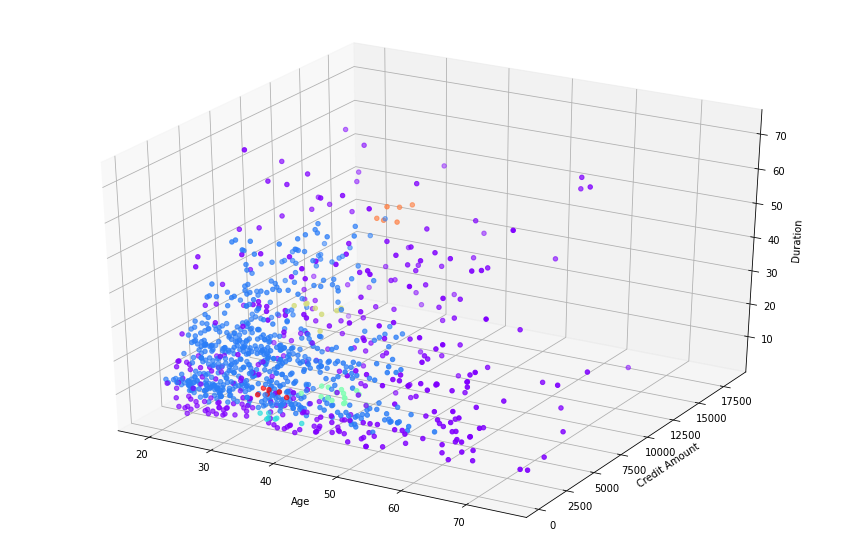

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=.37,min_samples=8)
model.fit(df_cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

#PCA 
La información o la variación de nuestras características originales se "comprime" en lo que PCA llama componentes principales (PC). La primera PC contendrá la mayor parte de la información de las funciones originales. La segunda PC contendrá la siguiente mayor cantidad de información, la tercera PC la tercera mayor cantidad de información y así sucesivamente.

De esta manera, podemos realizar un análisis con solo 2 o 3 componentes principales en lugar de 50 características, mientras mantenemos entre el 80 y el 90% de la información de nuestras características originales.


In [ ]:
from sklearn.datasets import load_iris
iris_data=load_iris()

In [ ]:
df_data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names,index=None)

df_target=pd.DataFrame(iris_data.target,columns=['class'])

df_target.loc[df_target['class'] ==0, 'Target_names'] = 'setosa'
df_target.loc[df_target['class'] ==1, 'Target_names'] = 'versicolor'
df_target.loc[df_target['class'] ==2, 'Target_names'] = 'virginica'

In [ ]:
standardized_data = StandardScaler().fit_transform(df_data)

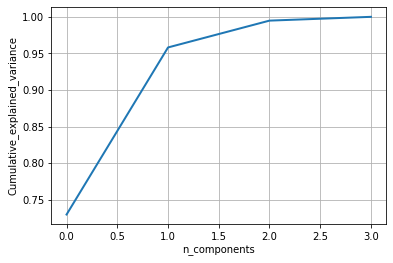

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

sample_data=standardized_data

pca.n_components = 4

pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:

pca.n_components = 2

pca_data = pca.fit_transform(sample_data)

df_pca= pd.DataFrame(data = pca_data , columns = ['principal_component_1', 'principal_component_2'])

In [ ]:

df_pred = pd.concat([df_pca,df_target],axis=1)

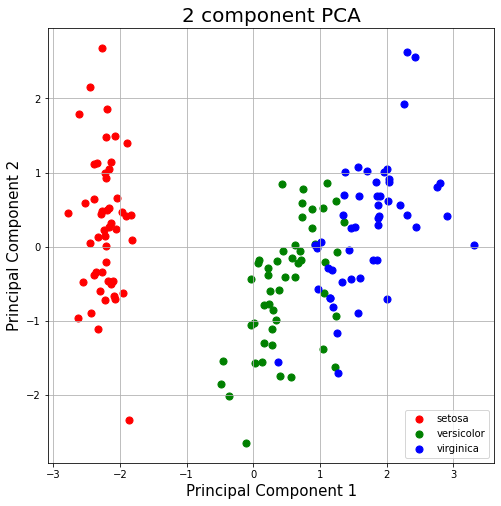

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices_targets = df_pred['Target_names'] == target
    ax.scatter(df_pred.loc[indices_targets, 'principal_component_1']
               , df_pred.loc[indices_targets, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#TSNE

Al igual que PCA, t-SNE toma datos de alta dimensión y los reduce a un gráfico de baja dimensión (normalmente 2-D). También es una gran técnica de reducción de dimensionalidad. A diferencia de PCA, t-SNE puede reducir dimensiones con relaciones no lineales. En otras palabras, si nuestros datos tuvieran esta distribución no lineal “Swiss Roll” donde el cambio en X o Y no se corresponde con un cambio constante en la otra variable. 

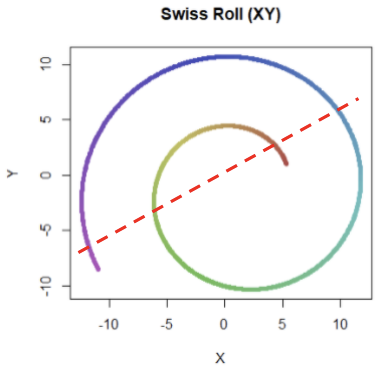

In [ ]:
# n^(1/2)
len(sample_data)

150

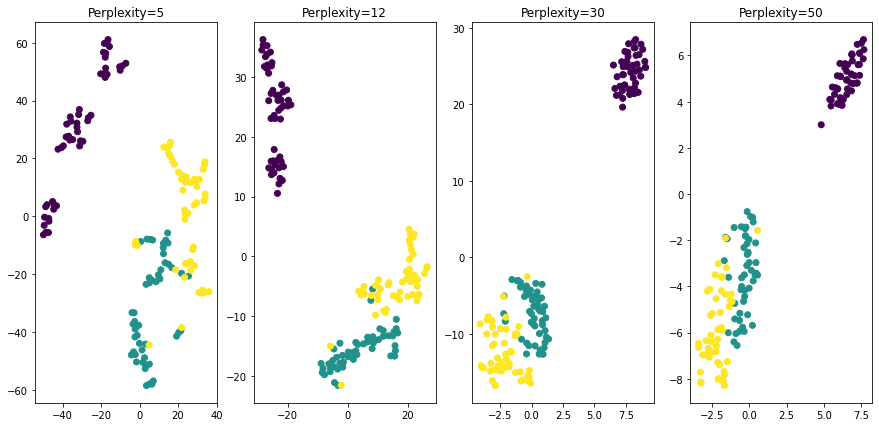

In [ ]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1,4, figsize = (15,7))
for i, perp in enumerate([5,12,30,50]):
  tsne = TSNE(perplexity = perp, random_state=123)
  x_embedded = tsne.fit_transform(sample_data)
  ax[i].scatter(x_embedded[:,0],x_embedded[:,1],c=df_pred['class'])
  ax[i].set_title("Perplexity={}".format(perp))

plt.show()

Una última cosa que necesitamos discutir sobre t-SNE es la “perplejidad”, que es un parámetro requerido cuando se ejecuta el algoritmo. 

La “perplejidad” determina cuán amplio o cuán estrecho de un espacio t-SNE captura similitudes entre puntos. Si su perplejidad es baja (quizás 2), t-SNE solo usará dos puntos similares y producirá un gráfico con muchos grupos dispersos. Sin embargo, cuando aumentamos la perplejidad a 10, t-SNE considerará 10 puntos vecinos como similares y los agrupará, lo que dará como resultado grupos de puntos más grandes.

Por lo general, establecemos la perplejidad entre 5 y 50, según el artículo publicado original.

